# Лабораторная работа №2 Обработка признаков Часть 1

**Цель лабораторной работы:** изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

**Задание:**
* Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
1. устранение пропусков в данных;
2. кодирование категориальных признаков;
3. нормализация числовых признаков.

**Выбранные датасеты:** 


**1. Titanic Dataset**

**Ссылка**: https://www.kaggle.com/c/titanic/data

**Колонки**:
- **PassengerId**: Уникальный идентификатор пассажира
- **Survived**: Выживание (0 = Нет, 1 = Да)
- **Pclass**: Класс билета (1 = 1-й, 2 = 2-й, 3 = 3-й)
- **Name**: Имя пассажира
- **Sex**: Пол пассажира
- **Age**: Возраст пассажира
- **SibSp**: Количество братьев, сестер и супругов на борту
- **Parch**: Количество родителей и детей на борту
- **Ticket**: Номер билета
- **Fare**: Плата за проезд
- **Cabin**: Номер каюты
- **Embarked**: Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

**2. Boston Housing Dataset**

**Ссылка**: https://www.kaggle.com/datasets/altavish/boston-housing-dataset

**Колонки**:
- **CRIM**: Уровень преступности на душу населения
- **ZN**: Доля земли под застройку, зонированная под жилые дома с участками более 25,000 кв. футов
- **INDUS**: Доля не розничных бизнес-акров на город
- **CHAS**: Прилегает к реке Чарльз (1 = да, 0 = нет)
- **NOX**: Концентрация оксидов азота (частей на 10 миллионов)
- **RM**: Среднее количество комнат на жилое помещение
- **AGE**: Доля домов, построенных до 1940 года
- **DIS**: Средневзвешенное расстояние до пяти бостонских центров занятости
- **RAD**: Индекс доступности радиальных шоссе
- **TAX**: Полная налоговая ставка на имущество за $10,000
- **PTRATIO**: Соотношение учеников к учителям по городам
- **B**: 1000(Bk - 0.63)^2 где Bk - доля черных по городам
- **LSTAT**: Процент населения с низким социальным статусом
- **MEDV**: Средняя стоимость домов, занимаемых владельцами (в тысячах долларов)

## Выполнение:

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Устранение пропусков в данных

In [2]:
# Подгрузка набора данных
data1 = pd.read_csv(r'data/titanic/test.csv', sep=",")

In [3]:
# Вывод содержания датасета
data1.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data1.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
flag = 0
# Проверим наличие пустых значений # Цикл по колонкам датасета
for col in data1.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data1[data1[col].isnull()].shape[0]

    if temp_null_count == 0:
        continue
    else:
        flag = 1
        print('{} - {}'.format(col, temp_null_count))
if flag == 0:
    print("Пустых значений нет")

Age - 86
Fare - 1
Cabin - 327


Для числовых данных, таких как Age и Fare выполним следующие действие:

In [6]:
# Заполнение числовых пропусков
data1['Age'] = data1['Age'].fillna(data1['Age'].mean())

In [7]:
data1['Fare'] = data1['Fare'].fillna(data1['Fare'].mean())

Пропуски категориальных данных, таких как Cabin, заполним модой (самым повторяющимся значением)

In [8]:
# Для категориальных данных, таких как Embarked, заполним самым частым значением
data1['Cabin'] = data1['Cabin'].fillna(data1['Cabin'].mode()[0])

In [9]:
# Повторная проверка
flag = 0
# Проверим наличие пустых значений # Цикл по колонкам датасета
for col in data1.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data1[data1[col].isnull()].shape[0]

    if temp_null_count == 0:
        continue
    else:
        flag = 1
        print('{} - {}'.format(col, temp_null_count))
if flag == 0:
    print("Пустых значений нет")

Пустых значений нет


### Кодирование категориальных признаков 

In [35]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

data1_save = data1

data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [36]:
data1['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
# Используем LabelEncoder для кодирования пола
from sklearn.preprocessing import OneHotEncoder


# Используем LabelEncoder для кодирования пола
label_encoder = LabelEncoder()
data1['Sex'] = label_encoder.fit_transform(data1['Sex'])

# Используем OneHotEncoder для кодирования порта посадки
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
embarked_encoded = one_hot_encoder.fit_transform(data1[['Embarked']])

# Создаем DataFrame из закодированных данных и добавляем к основному DataFrame
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))
df = pd.concat([data1, embarked_encoded_df], axis=1).drop('Embarked', axis=1)

# Анализ данных
# Средний возраст по полу
mean_age_by_sex = df.groupby('Sex')['Age'].mean()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
# Средняя стоимость билета по порту посадки
mean_fare_by_embarked = df.groupby('Embarked_S')['Fare'].mean()

In [39]:
# Количество пассажиров по полу
count_by_sex = df['Sex'].value_counts()

In [40]:
# Количество пассажиров по порту посадки
count_by_embarked = df['Embarked_S'].value_counts()

In [42]:
# Выводим результаты
print("Средний возраст по полу:")
print(mean_age_by_sex)
print("\nСредняя стоимость билета по порту посадки:")
print(mean_fare_by_embarked)
print("\nКоличество пассажиров по полу:")
print(count_by_sex)
print("\nКоличество пассажиров по порту посадки:")
print(count_by_embarked)

Средний возраст по полу:
Sex
0    30.272400
1    30.272699
Name: Age, dtype: float64

Средняя стоимость билета по порту посадки:
Embarked_S
0.0    49.071285
1.0    28.257832
Name: Fare, dtype: float64

Количество пассажиров по полу:
1    266
0    152
Name: Sex, dtype: int64

Количество пассажиров по порту посадки:
1.0    270
0.0    148
Name: Embarked_S, dtype: int64


### Нормализация числовых признаков

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
# Подгрузка набора данных
data3 = pd.read_csv(r'data/boston/HousingData.csv', sep=",")

In [13]:
# Вывод содержания датасета
data3.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
data3.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [15]:
import scipy.stats as stats

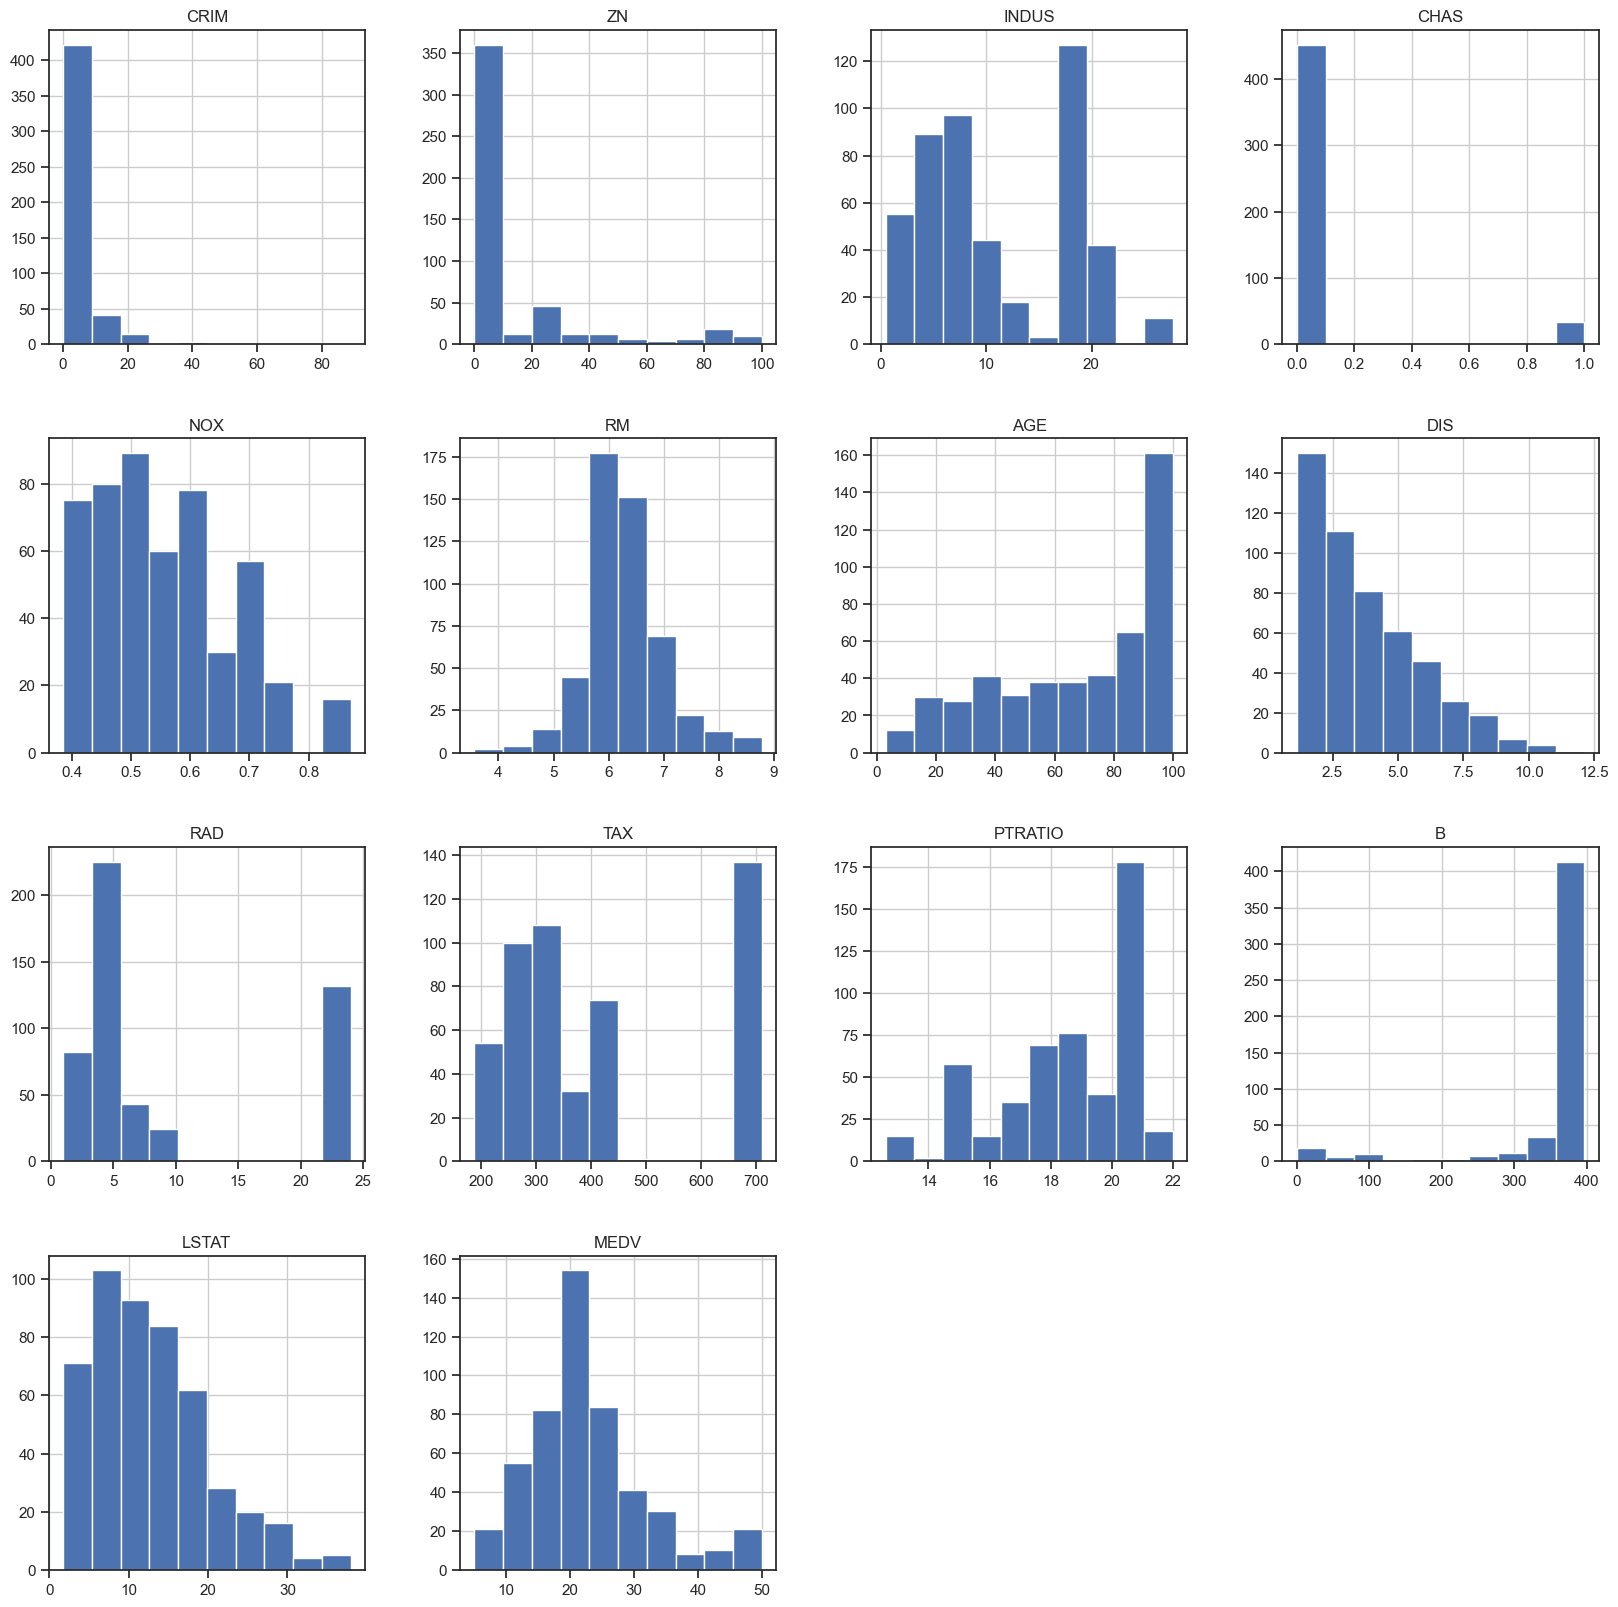

In [16]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15, 6))
    # Гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    plt.show()

data3.hist(figsize=(20, 20))
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(data3[['RM']])
# формируем DataFrame на основе массива
data_scaled =pd.DataFrame(data_cs31_scaled_temp, columns=['RM'])
data_scaled.describe()

,RM
count,506.000000
mean,0.521869
std,0.134627
min,0.000000
25%,0.445392
50%,0.507281
75%,0.586798
max,1.000000


In [20]:
data_scaled.loc[data_scaled['RM']==0]

,RM
365,0.0


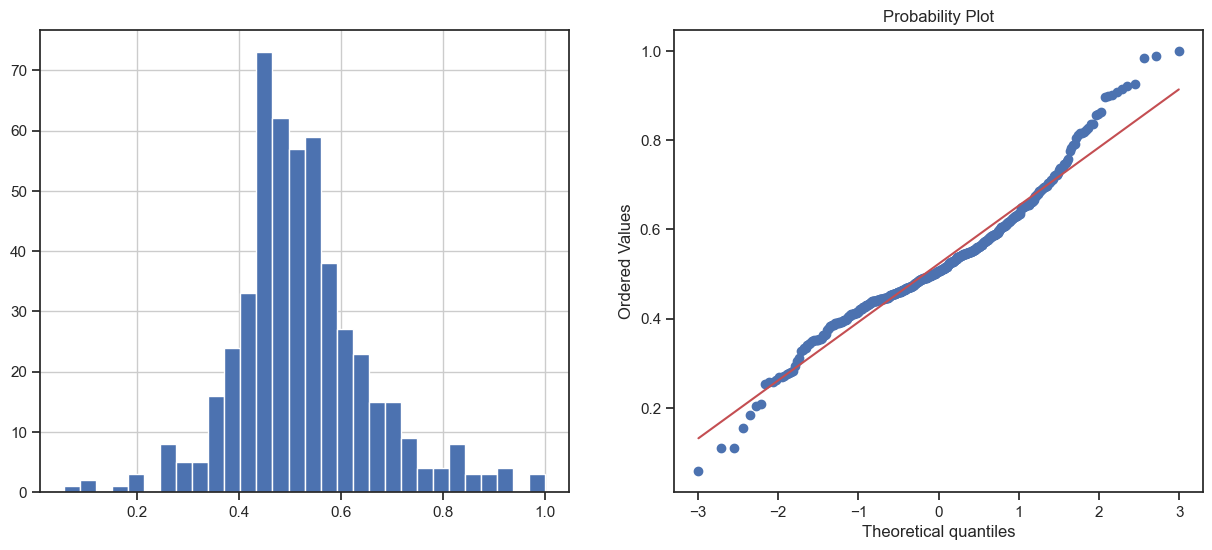

In [21]:
data_scaled = data_scaled.loc[data_scaled['RM']!=0]
diagnostic_plots(data_scaled, 'RM')

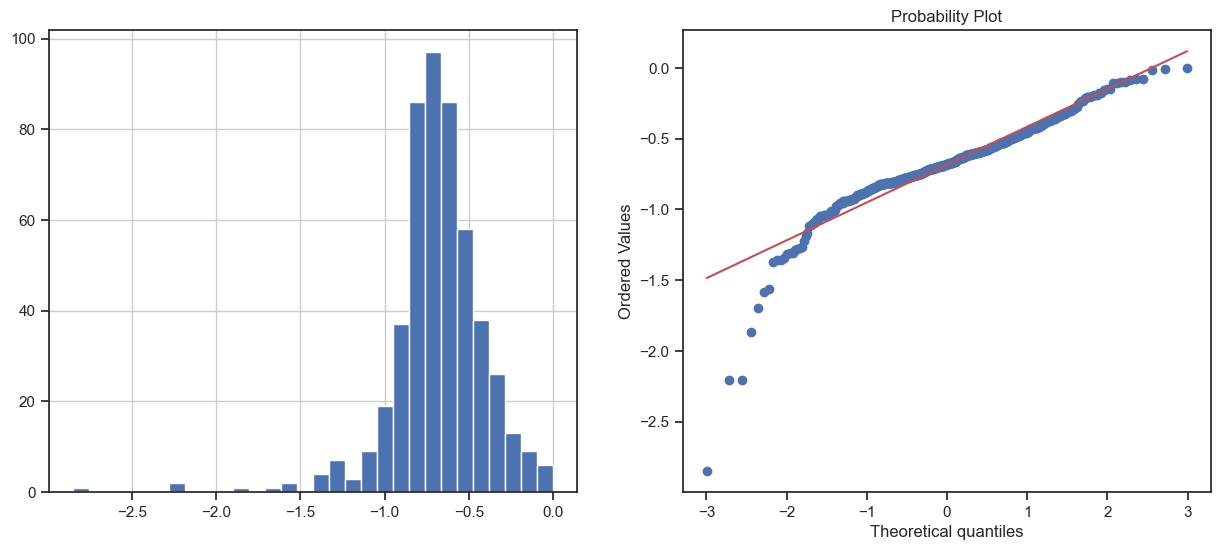

In [22]:
# логарифмическое
data_scaled['norm_log'] = np.log(data_scaled['RM'])
diagnostic_plots(data_scaled, 'norm_log')

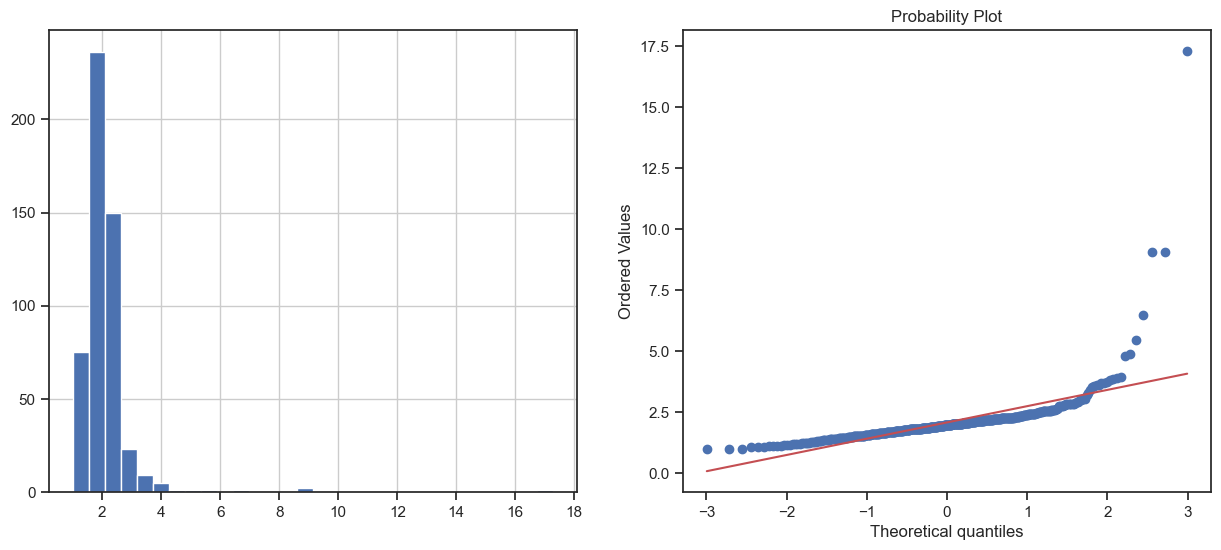

In [23]:
# обратное
data_scaled['norm_reciprocal'] = 1 / (data_scaled['RM'])
diagnostic_plots(data_scaled, 'norm_reciprocal')

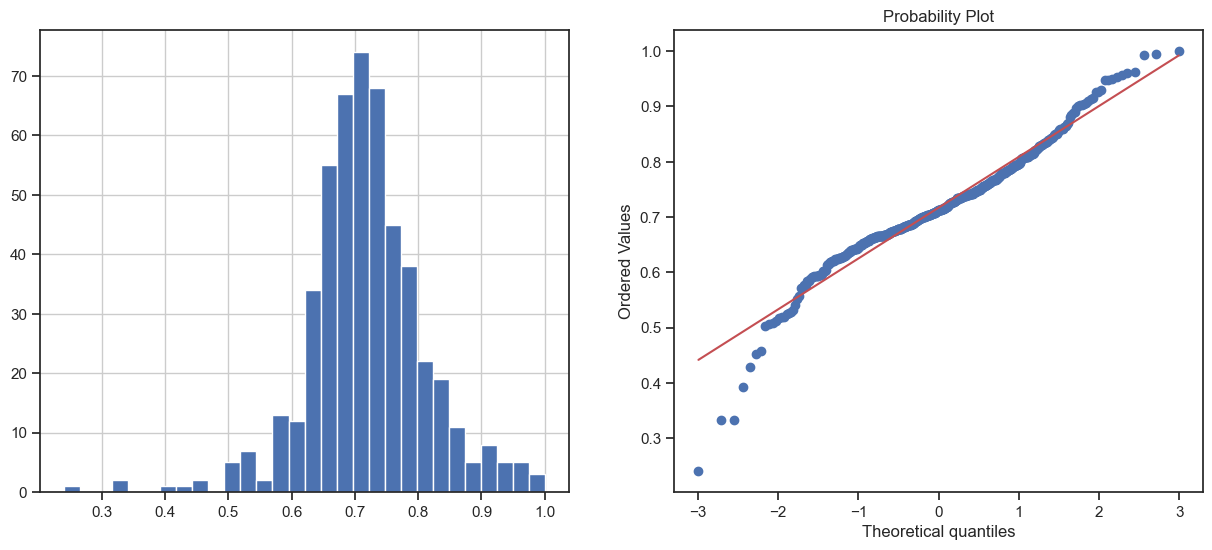

In [24]:
# Квадратный корень
data_scaled['norm_sqr'] = data_scaled['RM']**(1/2)
diagnostic_plots(data_scaled, 'norm_sqr')

Оптимальное значение λ = 0.7547326743378289


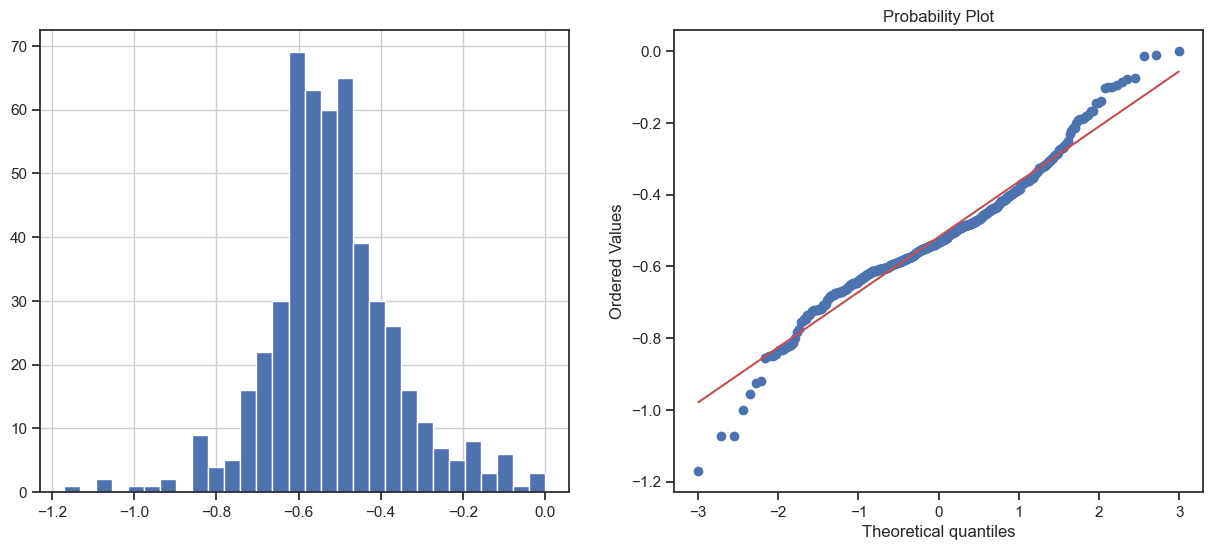

In [25]:
# Бокса-Кокса
data_scaled['norm_boxcox'], param = stats.boxcox(data_scaled['RM'])
print('Оптимальное значение λ = {}'.format(param)) 
diagnostic_plots(data_scaled, 'norm_boxcox')

Оптимальное значение λ = -0.12915094433552288


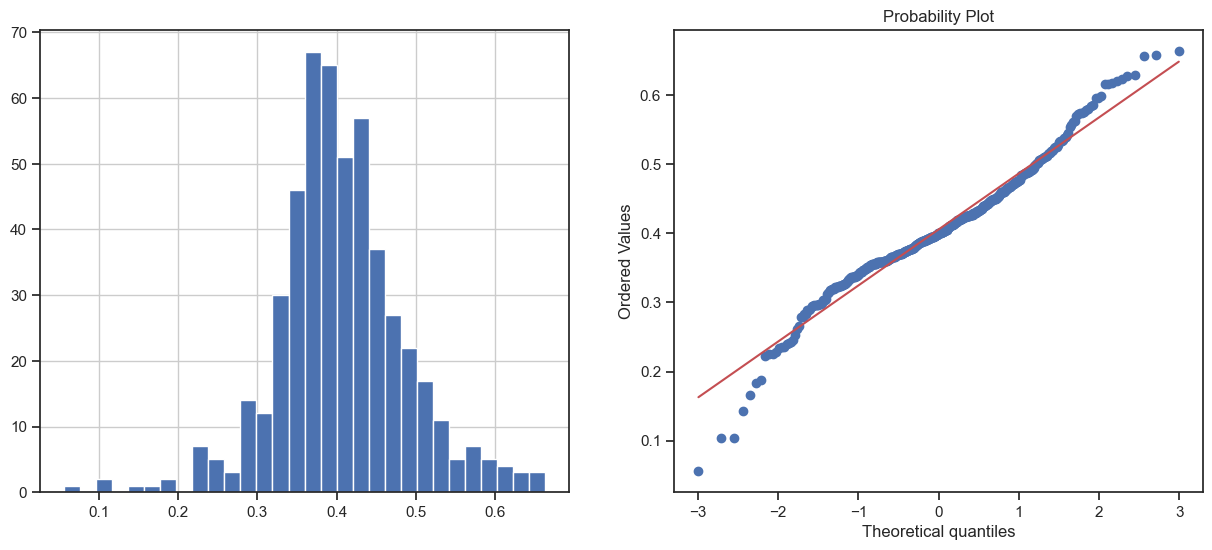

In [26]:
# Преобразование Йео-Джонсона
data_scaled['norm_yeojohnson'], param = stats.yeojohnson(data_scaled['RM']) 
print('Оптимальное значение λ = {}'.format(param)) 
diagnostic_plots(data_scaled, 'norm_yeojohnson')

## Выводы:
Датасет необходимо подготавливать перед проведением любой работы по машинному обучению. В ЛР мы выполнили следующие стратеги работы с пропусками:

• Удаление строк с пропусками, где их количество менее 1% - они не являлись значимыми.

• Заполнение пропусков

Категориальные признаки мы закодировали – чтобы была возможность сопоставить их в вычислениях с другими числовыми признаками, вычислить корреляцию.
Также была опробована нормализация.